In [10]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To visualize the loops
from tqdm import tqdm

# For file handeling and os operations
import os

# Weights and Biases for logging and artifacts
!pip install wandb -qqq
import wandb
wandb.login()

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

wandb: Currently logged in as: firemines. Use `wandb login --relogin` to force relogin


In [11]:
# Function to display images

def display_multiple_samples(n_rows,n_cols):
    # Get main folder path
    main_folder = "../ai_project/dataset"
    # Get types of handGestures
    types_of_hand_gestures = list(os.listdir("../ai_project/dataset"))
    # Iterate though directory and plot images
    for handGestures in types_of_hand_gestures:
        # Basmati's file name starts from small 'b'
        hand_gestures_folder = handGestures
        # Create a subplot
        figure,ax = plt.subplots(n_rows,n_cols,figsize=(20,10))
        plt.suptitle(handGestures.upper(),fontsize=20)
        for n in range((n_rows*n_cols)):
            # Read image
            hand_gestures_image_name = f"{rice} ({int(np.random.randint(1,150))}).jpg"
            hand_gestures_image_path = os.path.join(main_folder,hand_gestures_folder,hand_gestures_image_name)
            image = plt.imread(hand_gestures_image_path)
            # Display image
            ax.ravel()[n].imshow(image)
            ax.ravel()[n].set_axis_off()
            
        # Show the plot
        plt.tight_layout()
        plt.show()

In [12]:
# display_multiple_samples(5,5)

In [13]:
root_path = "../ai_project/dataset"

closed_fist = pd.DataFrame({"filepath":[os.path.join(root_path,"Closed_fist",os.listdir("../ai_project/dataset/Closed_fist")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':1})
finger_guns = pd.DataFrame({"filepath":[os.path.join(root_path,"Finger_guns",os.listdir("../ai_project/dataset/Finger_guns")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':2})
open_palm = pd.DataFrame({"filepath":[os.path.join(root_path,"Open_palm",os.listdir("../ai_project/dataset/Open_palm")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':3})
peace_sign = pd.DataFrame({"filepath":[os.path.join(root_path,"Peace_sign",os.listdir("../ai_project/dataset/Peace_sign")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':4})
pinky = pd.DataFrame({"filepath":[os.path.join(root_path,"Pinky",os.listdir("../ai_project/dataset/Pinky")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':5})

pointing = pd.DataFrame({"filepath":[os.path.join(root_path,"Pointing",os.listdir("../ai_project/dataset/Pointing")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':6})
rocknroll = pd.DataFrame({"filepath":[os.path.join(root_path,"Rocknroll",os.listdir("../ai_project/dataset/Rocknroll")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':7})
spiderman = pd.DataFrame({"filepath":[os.path.join(root_path,"Spiderman",os.listdir("../ai_project/dataset/Spiderman")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':8})
spock = pd.DataFrame({"filepath":[os.path.join(root_path,"Spock",os.listdir("../ai_project/dataset/Spock")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':9})
thumbs_up = pd.DataFrame({"filepath":[os.path.join(root_path,"Thumbs_up",os.listdir("../ai_project/dataset/Thumbs_up")[i]) for i in tqdm(range(150),position=0,leave=True)],'label':10})

df = pd.concat([closed_fist,finger_guns,open_palm,peace_sign,pinky,pointing,rocknroll,spiderman,spock,thumbs_up],axis=0)
df['label'] = df['label'].astype(str)
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 5167.69it/s]


,filepath,label
0,../ai_project/dataset\Closed_fist\closed_fist ...,1
1,../ai_project/dataset\Closed_fist\closed_fist ...,1
2,../ai_project/dataset\Closed_fist\closed_fist ...,1
3,../ai_project/dataset\Closed_fist\closed_fist ...,1
4,../ai_project/dataset\Closed_fist\closed_fist ...,1


In [14]:
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index(drop=True,inplace=True)
df.head()

,filepath,label
0,../ai_project/dataset\Rocknroll\rocknroll (146...,7
1,../ai_project/dataset\Peace_sign\peace_sign (1...,4
2,../ai_project/dataset\Pinky\pinky (179).JPG,5
3,../ai_project/dataset\Finger_guns\finger_guns ...,2
4,../ai_project/dataset\Peace_sign\peace_sign (1...,4


In [15]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = df['label'])
print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])

train 1125 validation 375


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen=ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           validation_split=0.2)

train_generator=datagen.flow_from_dataframe(
                                            dataframe=df,
                                            x_col="filepath",
                                            y_col="label",
                                            subset="training",
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(224,224))

test_generator=datagen.flow_from_dataframe(
                                           dataframe=df,
                                           x_col="filepath",
                                           y_col='label',
                                           batch_size=32,
                                           subset='validation',
                                           shuffle=False,
                                           class_mode='categorical',
                                           target_size=(224,224))

# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(datagen.flow_from_dataframe(valid_df, 
                                                  x_col="filepath",
                                                  y_col='label',
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  batch_size = 1024)) # one big batch

Found 1200 validated image filenames belonging to 10 classes.
Found 300 validated image filenames belonging to 10 classes.
Found 375 validated image filenames belonging to 10 classes.


(224, 224, 3)


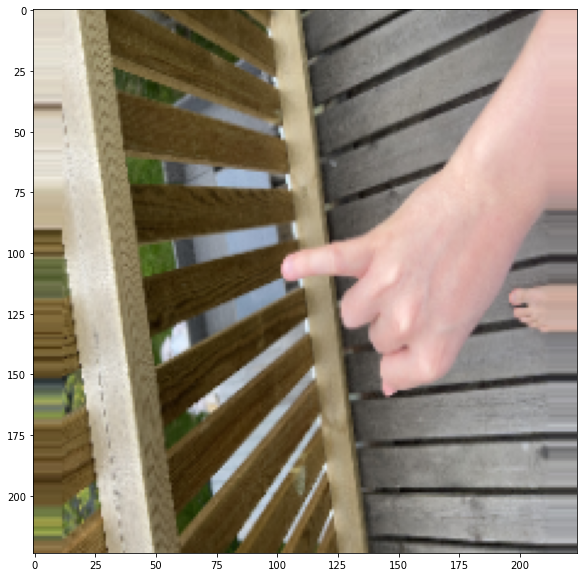

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(224, 224, 3)


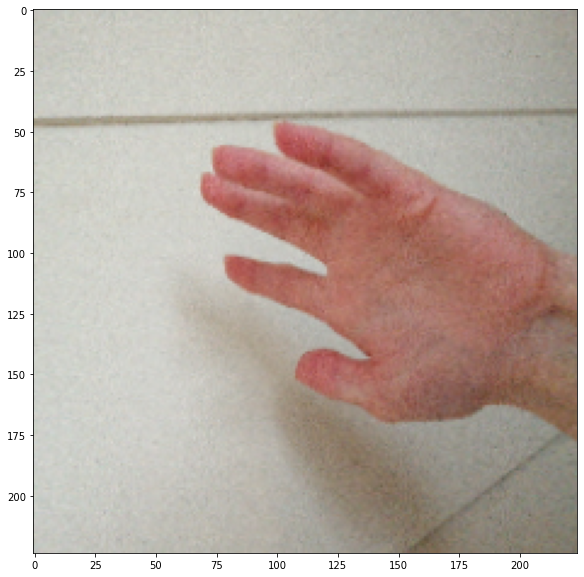

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(224, 224, 3)


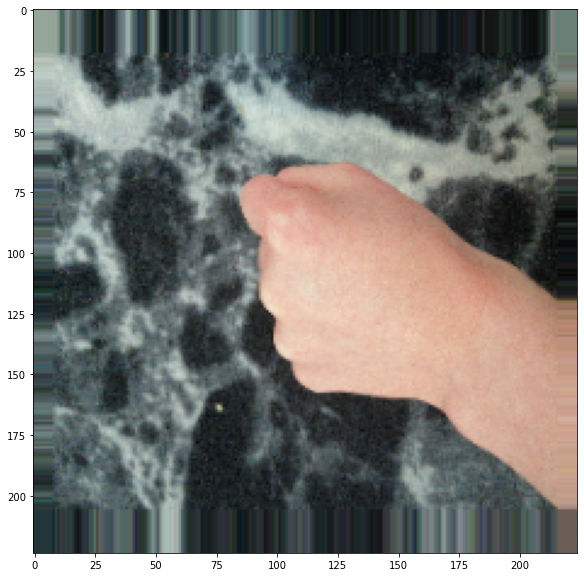

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(224, 224, 3)


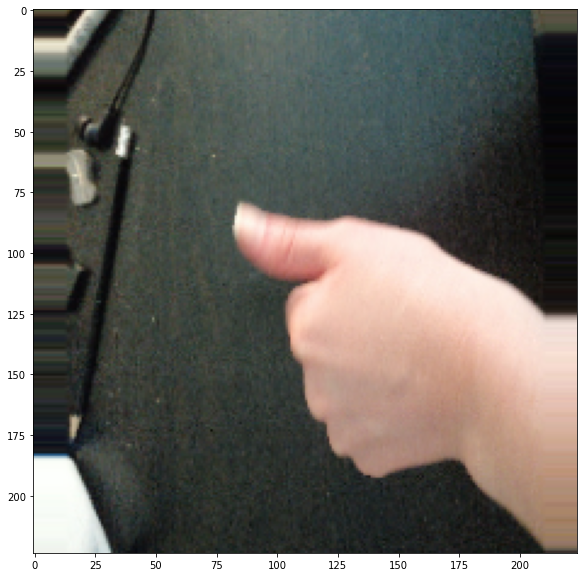

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(224, 224, 3)


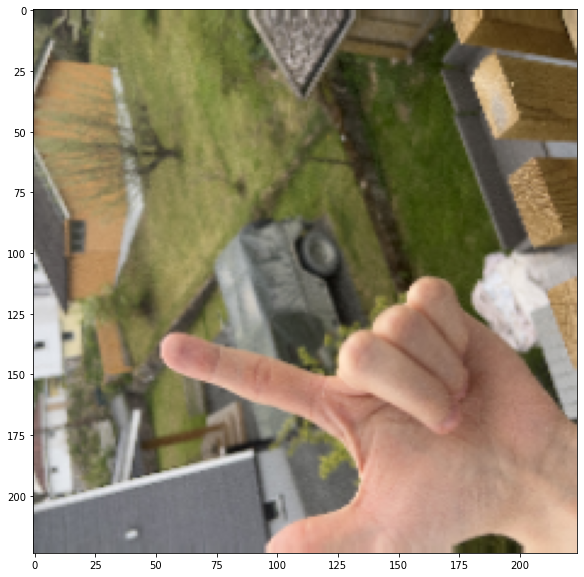

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
for batch in train_generator:
    images = batch[0]
    labels = batch[1]
    for i in range(5):
        plt.figure(figsize=(20,10))
        plt.imshow(images[i])
        print(images[i].shape)
        plt.show()
        print(labels[i])
    break

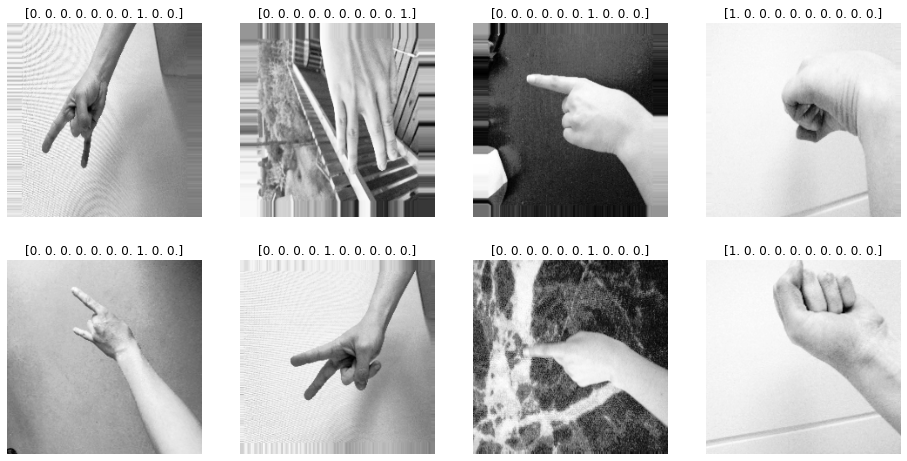

In [19]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,1], cmap = 'Greys_r')
    c_ax.set_title(c_y)
    c_ax.axis('off')

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from tensorflow.keras.models import Model

In [21]:
vgg = VGG16(input_shape =  t_x.shape[1:], weights='imagenet',include_top=False)

In [22]:
in_lay = Input(t_x.shape[1:])
vgg.trainable = False

# pt_depth = vgg.layers[0].compute_output_shape([224,224,3])
pt_features = vgg(in_lay)
pt_depth = vgg.get_output_shape_at(0)[-1]
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = LocallyConnected2D(1, kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)

# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)

# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'linear')(dr_steps) # linear is what 16bit did
hand_gesture_model = Model(inputs = [in_lay], outputs = [out_layer])
from keras.metrics import mean_absolute_error



hand_gesture_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = ['binary_accuracy'])

hand_gesture_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_5[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 rmalization)                                                                                     
                                                                                              

In [23]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('hand_gesture')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [24]:
hand_gesture_model.fit_generator(train_generator, 
                                  validation_data = (test_X, test_Y), 
                                  epochs = 1, 
                                  callbacks = callbacks_list)

38/38 [==============================] - ETA: 0s - loss: 0.6021 - binary_accuracy: 0.6860
Epoch 1: val_loss improved from inf to 0.11671, saving model to hand_gesture_weights.best.hdf5
38/38 [==============================] - 188s 5s/step - loss: 0.6021 - binary_accuracy: 0.6860 - val_loss: 0.1167 - val_binary_accuracy: 0.9000 - lr: 0.0010


In [25]:
# load the best version of the model
hand_gesture_model.load_weights(weight_path)

In [26]:
#et the attention layer since it is the only one with a single output dim
for attn_layer in hand_gesture_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

In [27]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)
hand_gesture_model(inputs = [in_lay], outputs = [out_layer])

attn_func = K.function(inputs = [hand_gesture_model.get_input_at(0), 
                                 K.learning_phase()],
                                outputs = [attn_layer.get_output_at(0)]
                      )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    img_ax.set_title('Hand Image\n')
    pred_hand = hand_gesture_model.predict(cur_img)
    attn_ax.set_title('Attention Map\nPred:%2.fY' % (pred_hand))
fig.savefig('attention_map.png', dpi = 300)

ValueError: Input has undefined rank. Received: input_shape=<unknown>.

In [ ]:
# Donot train the existing weights
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
# Flatten the last layer
x = Flatten()(vgg.output)

# Pass the flatten layer to final output layer
prediction = Dense(units=10,activation='softmax')(x)

# Create model
model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

In [ ]:
# Initialize a run
run = wandb.init(project='hand_gesture_types_classification',
                 config={
                     "batch_size":32,
                     "epochs":5,
                     "loss_function":"BinaryCrossentropy",
                 },name='training_logs')
# we will use the below variable to configure our training
config = wandb.config

In [ ]:
model.compile(loss=config.loss_function,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from wandb.keras import WandbCallback

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=config.epochs,
                              validation_data=(test_generator),
                              callbacks=[WandbCallback()])

In [37]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
#!pip3 install opencv-python
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [38]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(8,activation='softmax')(x) #FC-layer

In [39]:
model=Model(inputs = [in_lay], outputs = [out_layer])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_5[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 rmalization)                                                                                     
                                                                                            

In [40]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [41]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_5[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 7, 7, 512)   2048        ['vgg16[0][0]']                  
 rmalization)                                                                                     
                                                                                            

In [43]:
data=[]
labels=[]
random.seed(42)
imagePaths = sorted(list(os.listdir("../ai_project/dataset/")))
random.shuffle(imagePaths)
print(imagePaths)

for img in imagePaths:
    path=sorted(list(os.listdir("../ai_project/dataset/"+img)))
    for i in path:
        image = cv2.imread("../ai_project/dataset/"+img+'/'+img+" ("+i+')')
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        data.append(image)
        l = label = img
        labels.append(l)

['Spiderman', 'Peace_sign', 'Open_palm', 'Spock', 'Pointing', 'Rocknroll', 'Thumbs_up', 'Pinky', 'Closed_fist', 'Finger_guns']


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels[0])

In [ ]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.4,random_state=42)
print(xtrain.shape, xtest.shape)

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=1,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

In [ ]:
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

In [ ]:
label=imagePaths
print(imagePaths)
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()

In [ ]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)